In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('grayscale')

random_state = 2018
prefixo_dados = '201807151414'

In [2]:
eventos = pd.read_csv('dados/{}-eventos.csv'.format(prefixo_dados), error_bad_lines=False, warn_bad_lines=False, low_memory=False, index_col=False)

print('{} eventos carregados'.format(eventos.shape[0]))

eventos.head(1)

2579770 eventos carregados


id  tipo_id finalidade  area  quartos  suites  banheiros  vagas  \
0  4159        1      venda    85        3       1          2      2   

    latitude  longitude  area_privativa     preco  contato  
0 -19.870854 -43.929058               0  520000.0        0

# Dados

## Variáveis independentes

- **tipo_id:** Id correspondente ao tipo do imóvel (categórico)
- **bairro_id:** Id correspondente ao bairro do imóvel (categórico)
- **finalidade:** Finalidade da negociação (categórico: 'venda' ou 'aluguel')
- **preco:** Preço do imóvel (numérico)
- **area:** Área do imóvel (numérico)
- **quartos:** Número de quartos no imóvel (numérico)
- **suites:** Número de suítes no imóvel (numérico)
- **banheiros:** Número de suítes no imóvel (numérico)
- **vagas:** Número de vagas do imóvel (numérico)


# Variáveis dependentes
- **contato:** Se um imóvel listado foi contatado para mais informações (binário: '0' ou '1')


In [3]:
print('{} eventos'.format(eventos.shape[0]))
print('{} eventos de venda'.format(eventos.query('finalidade == "venda"').shape[0]))
print('{} eventos de aluguel'.format(eventos.query('finalidade == "aluguel"').shape[0]))

2579770 eventos
1608218 eventos de venda
971552 eventos de aluguel


In [4]:
print('{:.4f} de taxa contatos'.format(eventos['contato'].mean()))

0.0072 de taxa contatos


## Análise da variável dependente: finalidade
* venda
* aluguel

In [5]:
contatos_finalidades = eventos.groupby('finalidade').mean()

plt.figure(figsize=(15, 5))
plt.bar([0, 1], contatos_finalidades['contato'], width=0.5)
plt.xticks([0, 1], ['aluguel', 'venda'])
plt.show()

## Análise da variável dependente: tipo_id

Exemplos de tipos populares:

* 1  - Apartamento
* 2  - Cobertura
* 3  - Flat
* 4  - Casa
* 6  - Loja
* 7  - Lote
* 9  - Sala-andar
* 10 - Casa em Condomínio

In [6]:
tipos_populares_ids = [1, 2, 3, 4, 6, 7, 9, 10]
tipos_populares_nomes = [
    'Apartamento',
    'Cobertura',
    'Flat',
    'Casa',
    'Loja',
    'Lote',
    'Sala-andar',
    'Casa em Condomínio',
]

contatos_tipos = eventos.query('tipo_id in @tipos_populares_ids').groupby('tipo_id').mean()

tipos_posicoes = np.arange(len(tipos_populares_ids))

plt.figure(figsize=(15, 5))
plt.bar(tipos_posicoes, contatos_tipos['contato'], width=0.5)
plt.xticks(tipos_posicoes, tipos_populares_nomes)
plt.show()

## Análise da variável dependente: quartos
* 1
* 2
* 3
* 4

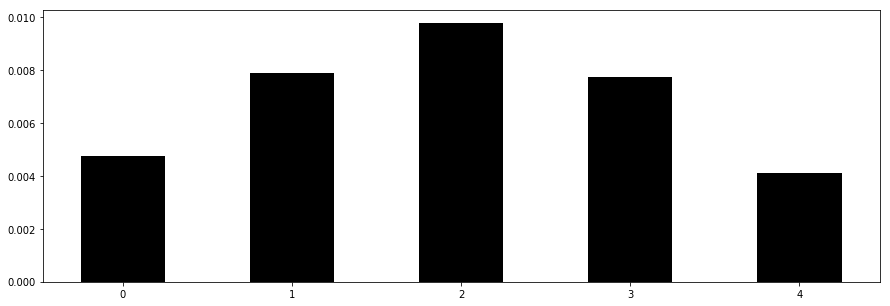

In [7]:
numero_quartos = list(range(0, 5))
eventos_quartos = eventos.query('quartos in @numero_quartos').groupby('quartos').mean()

plt.figure(figsize=(15, 5))
plt.bar(eventos_quartos.index, eventos_quartos['contato'], width=0.5)
plt.xticks(numero_quartos)
plt.show()

## Análise da variável dependente: banheiros
* 1
* 2
* 3
* 4

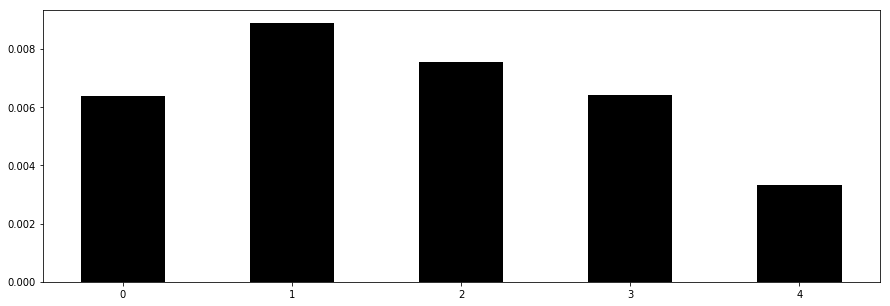

In [8]:
numero_banheiros = list(range(0, 5))
contatos_banheiros = eventos.query('banheiros in @numero_banheiros').groupby('banheiros').mean()

plt.figure(figsize=(15, 5))
plt.bar(contatos_banheiros.index, contatos_banheiros['contato'], width=0.5)
plt.xticks(numero_banheiros)
plt.show()

## Análise da variável dependente: suites
* 1
* 2
* 3
* 4

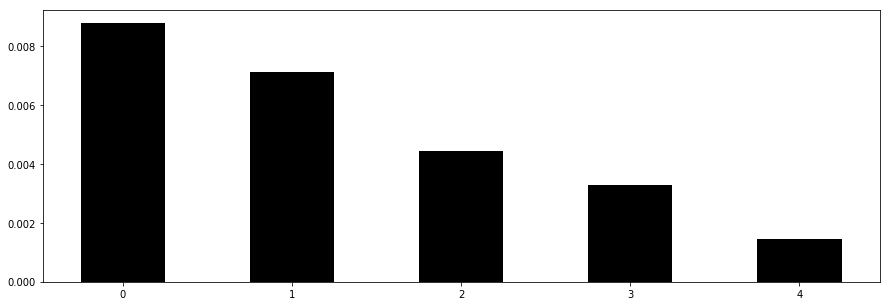

In [9]:
numero_suites = list(range(0, 5))
contatos_suites= eventos.query('suites in @numero_suites').groupby('suites').mean()

plt.figure(figsize=(15, 5))
plt.bar(contatos_suites.index, contatos_suites['contato'], width=0.5)
plt.xticks(numero_suites)
plt.show()

## Análise da variável dependente: vagas
* 1
* 2
* 3
* 4

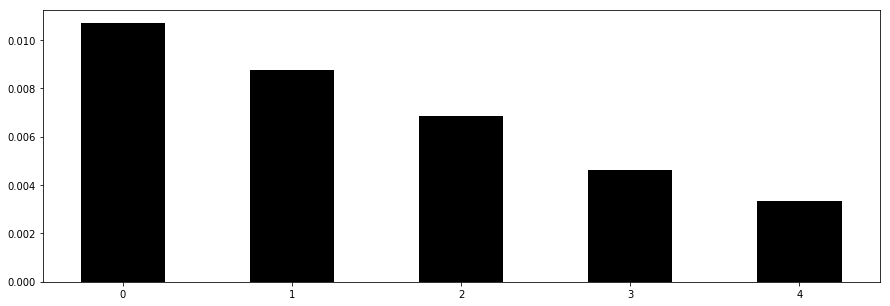

In [10]:
numero_vagas = list(range(0, 5))
contatos_vagas = eventos.query('vagas in @numero_vagas').groupby('vagas').mean()

plt.figure(figsize=(15, 5))
plt.bar(contatos_vagas.index, contatos_vagas['contato'], width=0.5)
plt.xticks(numero_vagas)
plt.show()

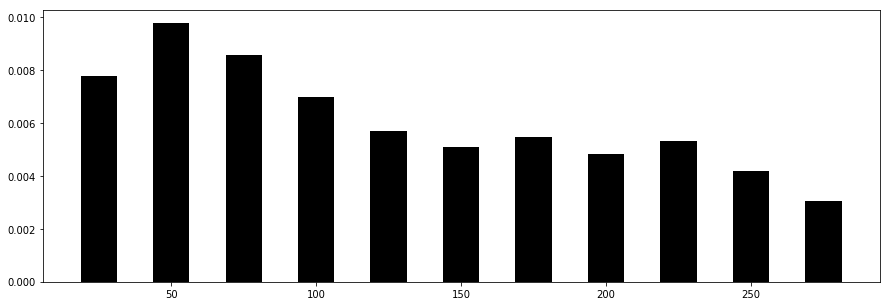

In [11]:
contatos_area = eventos.query('area >= 30 & area < 300') \
    .eval('area_arredondada = (area // 25) * 25') \
    .groupby('area_arredondada') \
    .mean()

plt.figure(figsize=(15, 5))
plt.bar(contatos_area.index, contatos_area['contato'], width=12.5)
plt.show()

## Análise da variável dependente: preço
* Aluguel: 500 a 3.000
* Venda: 200.000 a 1.500.000

In [12]:
contatos_preco_aluguel = eventos.query('finalidade == "aluguel" & preco >= 750 & preco <= 3000') \
    .eval('preco_arredondado = (preco // 250) * 250') \
    .groupby('preco_arredondado') \
    .mean()

plt.figure(figsize=(15, 5))
plt.bar(contatos_preco_aluguel.index, contatos_preco_aluguel['contato'], width=125)
plt.show()

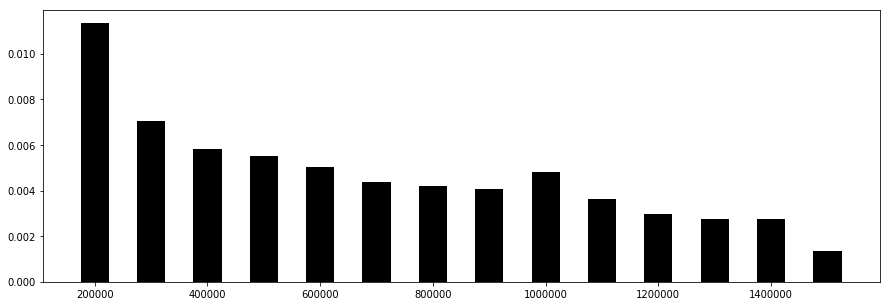

In [13]:
contatos_preco_venda = eventos.query('finalidade == "venda" & preco >= 200000 & preco <= 1500000') \
    .eval('preco_arredondado = (preco // 100000) * 100000') \
    .groupby('preco_arredondado') \
    .mean()

plt.figure(figsize=(15, 5))
plt.bar(contatos_preco_venda.index, contatos_preco_venda['contato'], width=50000)
plt.show()

## Análise das correlações

In [14]:
atributos_correlacoes = ['preco', 'area', 'quartos', 'suites', 'banheiros', 'vagas', 'contato']

eventos[atributos_correlacoes].corr()

preco      area   quartos    suites  banheiros     vagas  \
preco      1.000000  0.258009  0.250657  0.407881   0.422284  0.432428   
area       0.258009  1.000000  0.050380  0.103561   0.091862  0.206535   
quartos    0.250657  0.050380  1.000000  0.516857   0.516794  0.343522   
suites     0.407881  0.103561  0.516857  1.000000   0.727614  0.469884   
banheiros  0.422284  0.091862  0.516794  0.727614   1.000000  0.519514   
vagas      0.432428  0.206535  0.343522  0.469884   0.519514  1.000000   
contato   -0.018225 -0.000138 -0.013910 -0.015700  -0.015852 -0.014666   

            contato  
preco     -0.018225  
area      -0.000138  
quartos   -0.013910  
suites    -0.015700  
banheiros -0.015852  
vagas     -0.014666  
contato    1.000000

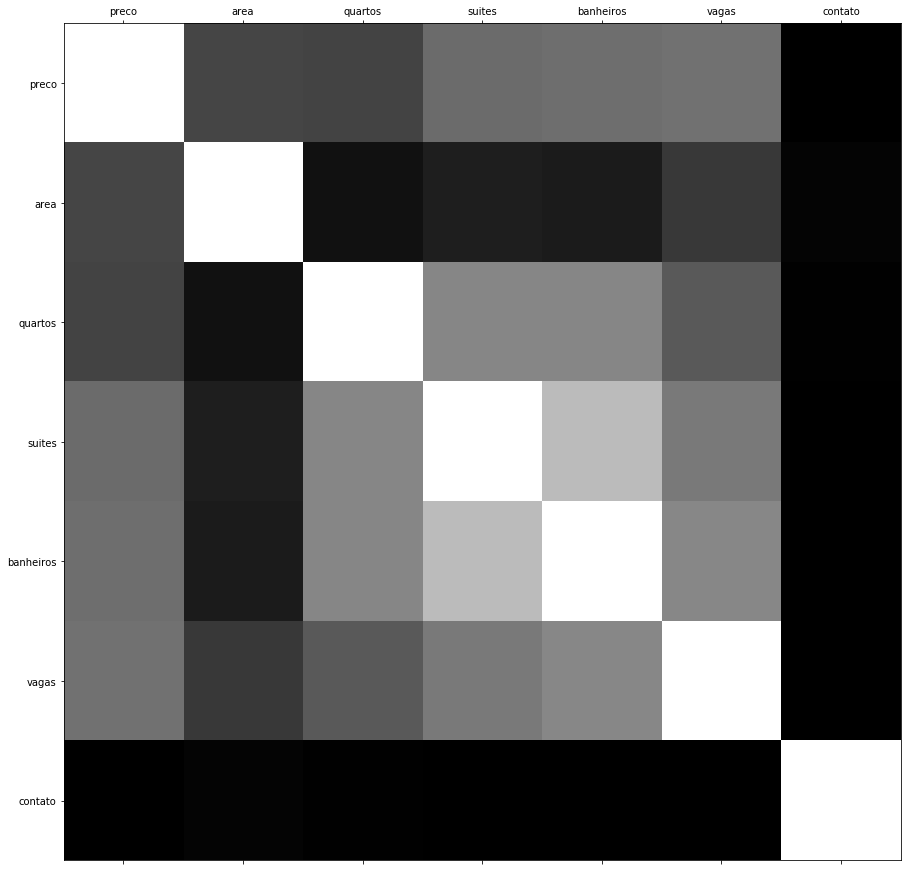

In [15]:
plt.figure(figsize=(15, 15))
plt.matshow(eventos[atributos_correlacoes].corr(), fignum=1)
plt.xticks(range(len(atributos_correlacoes)), atributos_correlacoes)
plt.yticks(range(len(atributos_correlacoes)), atributos_correlacoes)
plt.show()